In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(y[index])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


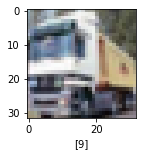

In [ ]:

plot_sample(x_train,y_train,1)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
cnn=models.Sequential([
                       #feature extraction
                       layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
                       layers.MaxPool2D((2,2)),
                      
                       layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
                       layers.MaxPool2D((2,2)),

                       #classification
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')
                       

])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:

cnn.fit(x_train,y_train,epochs=20
        )

Epoch 1/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4539 - accuracy: 0.4789
Epoch 2/20
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1285 - accuracy: 0.6030
Epoch 3/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0139 - accuracy: 0.6461
Epoch 4/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9344 - accuracy: 0.6744
Epoch 5/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8719 - accuracy: 0.6966
Epoch 6/20
 147/1563 [=>............................] - ETA: 45s - loss: 0.7795 - accuracy: 0.7296

KeyboardInterrupt: ignored

In [ ]:
y_pred=cnn.predict(x_test)
cnn.evaluate(x_test,y_test)
y_test=y_test.reshape(-1)
y_pred=cnn.predict(x_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9422 - accuracy: 0.6741


In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
print('Classification report: \n',classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.82      0.70      1000
           1       0.79      0.80      0.80      1000
           2       0.55      0.56      0.56      1000
           3       0.52      0.43      0.47      1000
           4       0.64      0.56      0.60      1000
           5       0.63      0.53      0.57      1000
           6       0.78      0.76      0.77      1000
           7       0.65      0.81      0.72      1000
           8       0.82      0.71      0.76      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

